# Neural Network Classification with TensorFlow - Exercises

### Replicate the model pictured in the TensorFlow Playground diagram usinf TensorFlow code. Compile it using Aadam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled, check a summary of the model.

In [18]:
import tensorflow as tf

In [19]:
# Recreate the model from TF Playground
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,1)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Summary of the model
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1, 6)              12        
                                                                 
 dense_19 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_20 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_21 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_22 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_23 (Dense)            (None, 1, 1)              7         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable 

### Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and the build a model to fit it at over 85% accuracy.

In [20]:
from sklearn.datasets import make_moons

# Create the dataset
dataset, labels = make_moons(
    n_samples=4096,
    shuffle=True,
    noise=0.202,
    random_state=42
)

# Inspect first 10 points in both data and labels
dataset[:10], labels[:10]

(array([[ 0.01381174,  0.86203699],
        [-0.53653285,  0.75495414],
        [ 2.0928444 ,  0.12923626],
        [-0.12973102,  0.71321369],
        [-0.37878943,  0.62506839],
        [-1.36932414,  0.32751097],
        [ 1.4790043 , -0.12702185],
        [-1.39634914,  0.23705917],
        [ 0.74450922,  0.29441599],
        [ 1.62979524, -0.47178577]]),
 array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1]))

<AxesSubplot: >

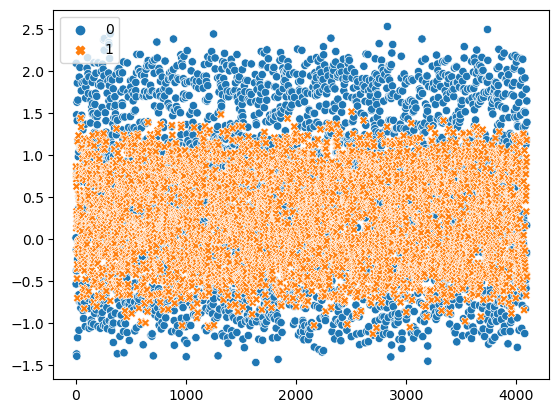

In [21]:
# Visualize the created data
import seaborn as sns
sns.scatterplot(dataset)

In [22]:
# Split the data for train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3276, 820, 3276, 820)

In [23]:
# Create basic model
model_moons_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the basic model
model_moons_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fitting the model
history_moons_1 = model_moons_1.fit(X_train,
                                    y_train,
                                    epochs=50,
                                    verbose=2)

# Evaluating the model
model_moons_1.evaluate(X_test, y_test)

Epoch 1/50


2023-06-29 17:38:35.897412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 - 1s - loss: 0.4865 - accuracy: 0.7979 - 1s/epoch - 11ms/step
Epoch 2/50
103/103 - 1s - loss: 0.2732 - accuracy: 0.8837 - 969ms/epoch - 9ms/step
Epoch 3/50
103/103 - 1s - loss: 0.2235 - accuracy: 0.9142 - 848ms/epoch - 8ms/step
Epoch 4/50
103/103 - 1s - loss: 0.1851 - accuracy: 0.9310 - 701ms/epoch - 7ms/step
Epoch 5/50
103/103 - 1s - loss: 0.1517 - accuracy: 0.9417 - 721ms/epoch - 7ms/step
Epoch 6/50
103/103 - 1s - loss: 0.1279 - accuracy: 0.9533 - 607ms/epoch - 6ms/step
Epoch 7/50
103/103 - 1s - loss: 0.1123 - accuracy: 0.9603 - 851ms/epoch - 8ms/step
Epoch 8/50
103/103 - 1s - loss: 0.0997 - accuracy: 0.9683 - 621ms/epoch - 6ms/step
Epoch 9/50
103/103 - 1s - loss: 0.0934 - accuracy: 0.9686 - 597ms/epoch - 6ms/step
Epoch 10/50
103/103 - 1s - loss: 0.0919 - accuracy: 0.9692 - 563ms/epoch - 5ms/step
Epoch 11/50
103/103 - 1s - loss: 0.0906 - accuracy: 0.9649 - 563ms/epoch - 5ms/step
Epoch 12/50
103/103 - 1s - loss: 0.0879 - accuracy: 0.9734 - 597ms/epoch - 6ms/step
Epoch 13/50
10

2023-06-29 17:39:06.240788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9634


[0.08989028632640839, 0.9634146094322205]

<AxesSubplot: >

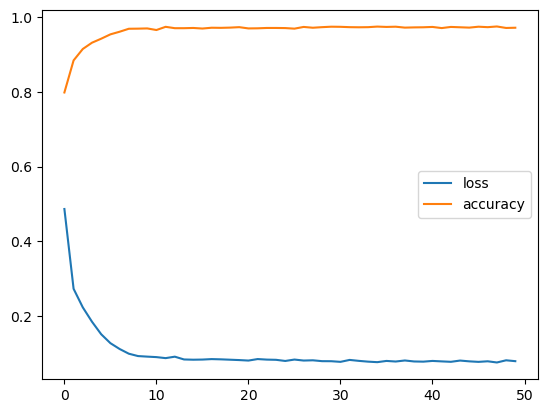

In [24]:
import pandas as pd
df = pd.DataFrame(history_moons_1.history)
df.plot()

Quite easily model achieved approx. 97% accuracy on created dataset. Looking at the plot, not much was probably possible due to distribution of the data. Probably changing the `make_moons()` arguments a bit would impact the final outcome (mostly `noise` parameter).

### Train a model to get 88%+ accuracy on the `fashion_mnist` dataset. Plot a confusion matrix to see the results afterwards.

In [25]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

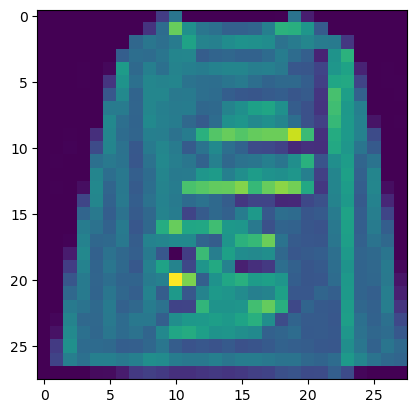

In [26]:
import matplotlib.pyplot as plt
import random

test_img = random.choice(train_data)
plt.imshow(test_img)

In [27]:
class_names = ['Tshirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

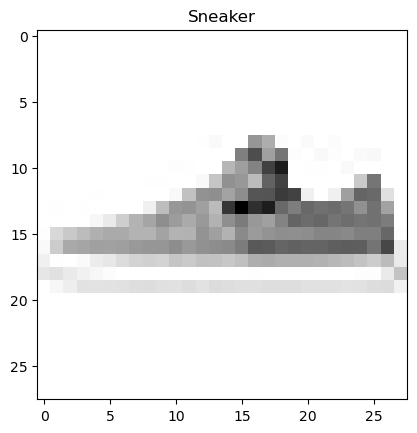

In [28]:
# Plot exemplary image and its label
import numpy as np
item_no = np.random.randint(0, 
                            len(train_data))

plt.imshow(train_data[item_no],
           cmap=plt.cm.binary)
plt.title(class_names[train_labels[item_no]])

In [29]:
# Normalize the data
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

In [30]:
# Basic multiclass classification model

tf.random.set_seed(42)

model_mnist_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_1 = model_mnist_1.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)))

# Evaluate the model
model_mnist_1.evaluate(test_data_normalized, test_labels)

Epoch 1/15
   9/1875 [..............................] - ETA: 12s - loss: 2.2699 - accuracy: 0.1736     

2023-06-29 17:39:07.616480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1867/1875 [============================>.] - ETA: 0s - loss: 0.6399 - accuracy: 0.7732

2023-06-29 17:39:20.255724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 9ms/step - loss: 0.6391 - accuracy: 0.7735 - val_loss: 0.4610 - val_accuracy: 0.8362
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4362 - accuracy: 0.8459 - val_loss: 0.4828 - val_accuracy: 0.8345
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3997 - accuracy: 0.8580 - val_loss: 0.4037 - val_accuracy: 0.8537
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3753 - accuracy: 0.8656 - val_loss: 0.4050 - val_accuracy: 0.8554
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3597 - accuracy: 0.8701 - val_loss: 0.3842 - val_accuracy: 0.8584
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3479 - accuracy: 0.8734 - val_loss: 0.4031 - val_accuracy: 0.8518
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3394 - accuracy: 0.8778 - val_loss: 0.3817 - val_accuracy: 0.8

2023-06-29 17:42:27.352728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3593 - accuracy: 0.8718


[0.3592721223831177, 0.8718000054359436]

In [31]:
# Basic multiclass classification model - v2

tf.random.set_seed(42)

model_mnist_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_2 = model_mnist_2.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)))

# Evaluate the model
model_mnist_2.evaluate(test_data_normalized, test_labels)

Epoch 1/15
   9/1875 [..............................] - ETA: 11s - loss: 2.1872 - accuracy: 0.1806 

2023-06-29 17:42:29.305744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.5763 - accuracy: 0.7942

2023-06-29 17:42:40.274094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.5762 - accuracy: 0.7943 - val_loss: 0.4338 - val_accuracy: 0.8437
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4072 - accuracy: 0.8530 - val_loss: 0.4476 - val_accuracy: 0.8348
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3662 - accuracy: 0.8668 - val_loss: 0.4002 - val_accuracy: 0.8522
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3448 - accuracy: 0.8748 - val_loss: 0.3793 - val_accuracy: 0.8641
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3285 - accuracy: 0.8796 - val_loss: 0.3712 - val_accuracy: 0.8678
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3136 - accuracy: 0.8852 - val_loss: 0.3786 - val_accuracy: 0.8581
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3044 - accuracy: 0.8873 - val_loss: 0.3777 - val_accuracy: 0.8

2023-06-29 17:45:56.949660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3459 - accuracy: 0.8753


[0.34593719244003296, 0.8752999901771545]

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ProgbarLogger

early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      verbose=1,
                      restore_best_weights=True)

reduce = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.1,
                           patience=2,
                           verbose=1)

In [33]:
# Basic multiclass classification model - v3 with callbacks

tf.random.set_seed(42)

model_mnist_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_3 = model_mnist_3.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)),
                                    callbacks=[early, reduce, ProgbarLogger()])

# Evaluate the model
model_mnist_3.evaluate(test_data_normalized, test_labels)

Epoch 1/15
      0/Unknown - 0s 0s/sample - loss: 2.2498 - accuracy: 0.1458

2023-06-29 17:45:59.034074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


      0/Unknown - 11s 0s/sample - loss: 0.5708 - accuracy: 0.7970

2023-06-29 17:46:09.839791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 7ms/sample - loss: 0.5705 - accuracy: 0.7971 - val_loss: 0.4253 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/sample - loss: 0.4039 - accuracy: 0.8518 - val_loss: 0.4123 - val_accuracy: 0.8539 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/sample - loss: 0.3668 - accuracy: 0.8650 - val_loss: 0.3772 - val_accuracy: 0.8620 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/sample - loss: 0.3457 - accuracy: 0.8731 - val_loss: 0.3780 - val_accuracy: 0.8646 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 14s 8ms/sample - loss: 0.3331 - accuracy: 0.8779 - val_loss: 0.3749 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.3170 - accuracy: 0.8822 - val_loss: 0.3831 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 7/15
   0/1875 [.............................

2023-06-29 17:49:20.353329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.3280 - accuracy: 0.8842


[0.3279961347579956, 0.8841999769210815]

In [34]:
# Basic multiclass classification model - v4 with callbacks

tf.random.set_seed(42)

model_mnist_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_mnist_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_4 = model_mnist_4.fit(train_data_normalized,
                                    train_labels,
                                    epochs=20,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)),
                                    callbacks=[early, reduce])

# Evaluate the model
model_mnist_4.evaluate(test_data_normalized, test_labels)

Epoch 1/20


2023-06-29 17:49:23.460680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.7472

2023-06-29 17:49:37.546136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.6910 - accuracy: 0.7472 - val_loss: 0.4672 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4429 - accuracy: 0.8437 - val_loss: 0.4364 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3974 - accuracy: 0.8587 - val_loss: 0.4098 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3710 - accuracy: 0.8672 - val_loss: 0.3907 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3524 - accuracy: 0.8742 - val_loss: 0.3836 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3408 - accuracy: 0.8771 - val_loss: 0.3946 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 7/20
1869/1875 [============================>.] - ETA: 0s

2023-06-29 17:54:44.485798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3369 - accuracy: 0.8824


[0.3368626534938812, 0.8823999762535095]

Two latter models reached and broke 88%+ barrier to pass the exercise. Previous ones were also very close to do so with high 87% results.

### Recreate TensorFlow `softmax` activation function in your own code. Make sure it can accept a tensor and return that tensor after having softmax function applied to it.

In [35]:
# Exemplary tensors
import tensorflow as tf

tensor_1d = tf.constant([1, 2, 1])

tensor_2d = tf.constant([[1,2,1],
             [2,1,2]])

tensor_3d = tf.constant([[[1,2,1],
              [2,1,2]],
             [[3,4,5],
              [5,4,2]],
             [[5,3,2],
              [6,3,1]]])

tensor_1d.shape, tensor_2d.shape, tensor_3d.shape

(TensorShape([3]), TensorShape([2, 3]), TensorShape([3, 2, 3]))

In [36]:
def selfmade_softmax(tensor):
	# Imports
	import tensorflow as tf
	from math import exp
	import numpy as np

	# Tensor to NumPy array, save the shape of input
	tensor_input = list(tensor.numpy().flatten())
	input_shape = tensor.shape.as_list()

	# Necessay variables
	tensor_output = []
	check = 0
	sum_exp = 0

	# Get the exponent of tensor and sum of all exponent values in tensor
	for value in tensor_input:
		sum_exp += exp(value)

	# Calculate softmax for each value in tensor
	for value in tensor_input:
		temp = exp(value)/sum_exp
		tensor_output.append(temp)
		check += temp

	# Reshape to input shape
	tensor_output = tf.reshape(tensor_output, input_shape)

	if np.isclose(check, 1):
		return tensor_output

In [37]:
%%timeit
selfmade_softmax(tensor_3d)

277 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Create a function to visualize multiple image predictions for the `fashion_mnist` dataset at the same time. Plot at least three different images of a certain class and their prediction labels at the same time.

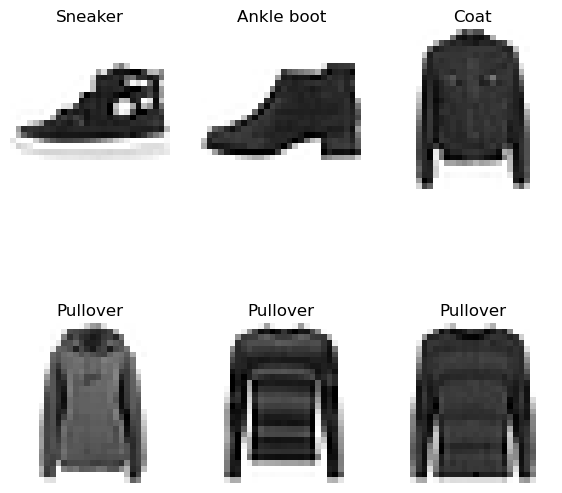

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Plotting training data
plt.figure(figsize=(7,7))
for i in range(6):
	ax = plt.subplot(2, 3, i+1) # i cannot be 0
	choice = random.choice(range(len(train_data)))
	plt.imshow(train_data[choice], cmap=plt.cm.binary)
	plt.title(class_names[train_labels[choice]])
	plt.axis(False)

In [39]:
# Making predicitons
mnist_preds = model_mnist_3.predict(test_data)
mnist_final = tf.argmax(mnist_preds, axis=1)
mnist_final[:10]

 84/313 [=======>......................] - ETA: 0s

2023-06-29 17:54:48.626906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

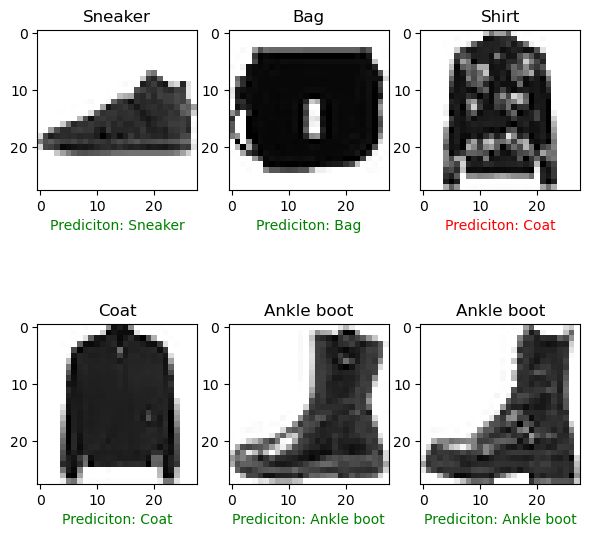

In [40]:
# Plotting predictions with truth labels
plt.figure(figsize=(7,7))

for i in range(6):
    plt.subplot(2, 3, i+1)
    choice = random.choice(range(len(test_data)))
    plt.imshow(test_data[choice], cmap=plt.cm.binary)

    if mnist_final[choice] == test_labels[choice]:
        color = 'green'
    else:
        color = 'red'
        
    plt.title(label=class_names[test_labels[choice]])
    plt.xlabel(f"Prediciton: {class_names[mnist_final[choice]]}", color=color)
    #plt.axis(False)

### Make a function to show an image of a certain class of the `fasion_mnist` dataset and make a prediciton on it. For example, plot 3 images of the T-shirt class with their predictions.

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

def class_predictior(model=model_mnist_3):
   
    class_no = random.choice(range(9))

    plt.figure(figsize=(7,7))
    for i in range(6):
        # Randomly choose data from given class
        choice = 11
        while test_labels[choice] != class_no:
            choice = random.choice(range(len(test_labels)))
        
		# Make prediction on chosen data
        pred = tf.argmax(model.predict(test_data[choice], verbose=0), axis=1)

        # Check the prediction and use corresponding color
        if test_labels[choice] == pred:
            color = 'green'
        else:
            color = 'red'

        # Plot the grid
        plt.subplot(2, 3, i+1)
        plt.imshow(test_data[choice], cmap=plt.cm.binary)
        plt.title(class_names[test_labels[choice]])
        plt.xlabel(f"Prediction: {class_names[pred[0]]}", color=color)
    return        

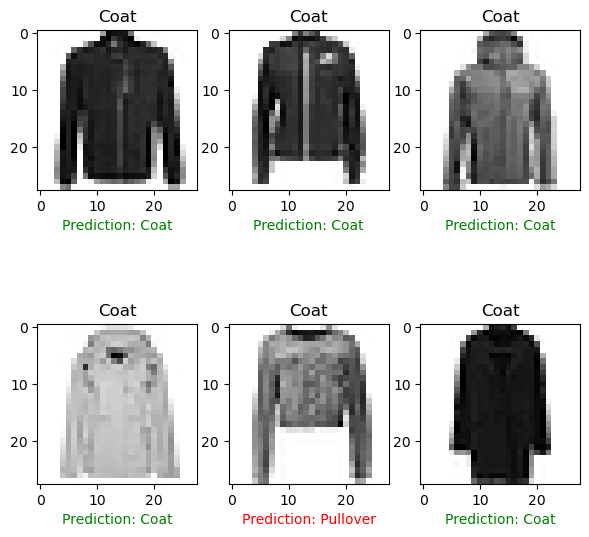

In [54]:
class_predictior(model=model_mnist_3)